## Week 1: Framing

### Step 1: Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Step 2: Generate Data

``Create X``

In [ ]:
# set a random seed (makes sure the results are reproducible)
np.random.seed(42)

len_X = 50

# Create X
# evenly spaced X values in [0, 1], len = 100
X = np.linspace(0, 1, len_X)

In [ ]:
# shape
X.shape, X. ndim, X.size

((50,), 1, 50)

In [ ]:
# check: print a few values
X[:5]

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265])

``Create a function``

In [ ]:
# Create a function to approximate
# + add random noise; using samples of random numbers from the standard normal distribution (mean of 0 and a standard deviation of 1)
def true_fn(x, len_X):
  return np.sin(2 * np.pi * x) + np.random.randn(len_X)*0.2
  #return np.cos(1.5 * np.pi * x) + np.random.randn(len_X)*0.2
  #return x**2 + np.sin(x)

``Create y``

In [ ]:
# Create y:
y = true_fn(X, len_X)

# print 5 y values & round to 2 decimal places
print(['%.2f' %i for i in y[:5]])

['0.10', '0.10', '0.38', '0.68', '0.44']


In [ ]:
# shape
y.shape, y.ndim, y.size

((50,), 1, 50)

### Step 3: Preprocessing

#### Input & Output --> (Features & Lables)

X: feature/s <bk>

y: labels

In [ ]:
# Reshaping X into a vector (other ways to experiment with: try np.newaxis)
X = X.reshape(-1, 1)

In [ ]:
X.shape

(50, 1)

In [ ]:
X[0:5]

array([[0.        ],
       [0.02040816],
       [0.04081633],
       [0.06122449],
       [0.08163265]])

#### Create Train & Test data sets

In [ ]:
# split the data (from sklearn get the train_test_split() method)
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.30
)

# shape of all data sets
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (35, 1)
y_train (35,)
X_test (15, 1)
y_test (15,)


### Step 4: Learning a Model/ Evaluation/ Generalization

``Linear Model``

In [ ]:
# Fit a linear regression model
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)
print ('Estimated fn: y = %.2f + %.2fx' %(lr.intercept_, lr.coef_[0]))

Estimated fn: y = 0.80 + -1.80x


In [ ]:
# Predict using the linear model
lr_yhat_train = lr.predict(X_train)
lr_yhat_test = lr.predict(X_test)

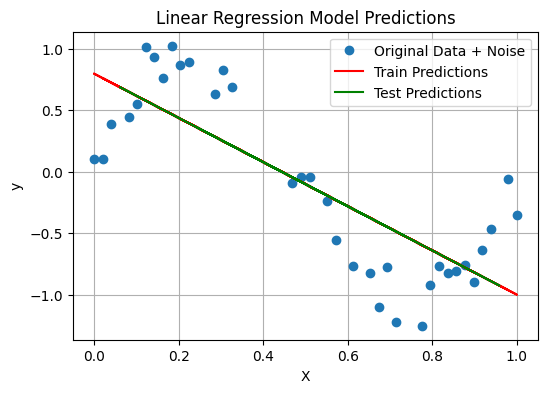

In [ ]:
# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, label='Original Data + Noise', marker='o', linestyle='None')
plt.plot(X_train, lr_yhat_train, label='Train Predictions', color='red')
plt.plot(X_test, lr_yhat_test, label='Test Predictions', color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model Predictions')
plt.legend()
plt.grid(True)
plt.show()

``Polynomial (Nonlinear) Regression``

In [ ]:
def polynomial_regression(degree):

  # Generate polynomial feature transforms
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  poly_X_train = poly.fit_transform(X_train)
  poly_X_test = poly.transform(X_test)

  # Fit a linear regression model to the polynomial features
  poly_lr = LinearRegression(fit_intercept=True)
  poly_lr.fit(poly_X_train, y_train)

  # Predict using the polynomial model
  poly_yhat_train = poly_lr.predict(poly_X_train)
  poly_yhat_test = poly_lr.predict(poly_X_test)

  # plot the true function with noise added
  sns.scatterplot(x=np.squeeze(X_train), y=np.squeeze(y_train), label="Function with noise");

  # fitted function
  sns.lineplot(x=np.squeeze(X_train), y=poly_yhat_train, color='black', label='Eval, train data')
  sns.lineplot(x=np.squeeze(X_test), y=poly_yhat_test, color='red', label='Eval, test data')

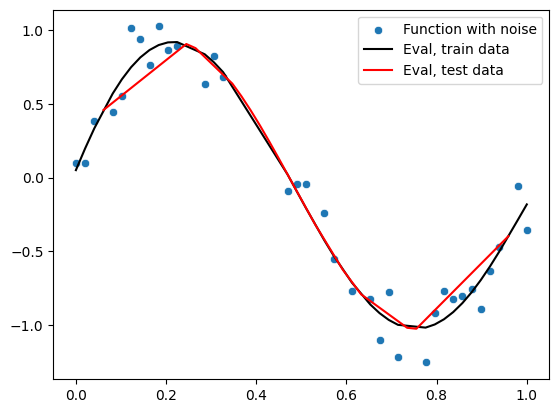

In [ ]:
# degree = 5
polynomial_regression(5)

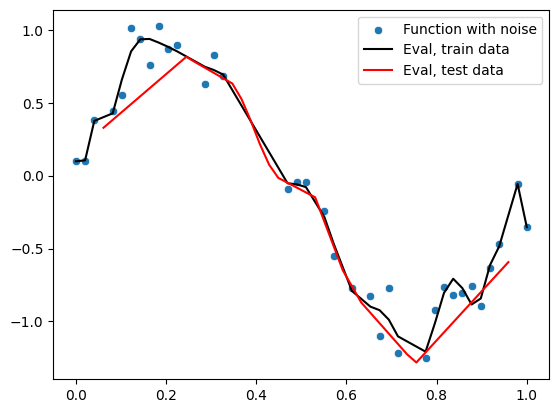

In [ ]:
# degree = 20
polynomial_regression(20)